In [1]:
import pandas as pd
import compare_outcomes as co

In [2]:
actual_2024 = co.prep_bts('2024-01-28', '2024-01-28', '../db/truth/T_ONTIME_REPORTING_2024.csv')
actual_2024.reset_index(names='id', inplace=True)
comps_2024 = []
for i in range(5):
    sim = pd.read_csv(f'jan28-bts-import-run{i}-flights.csv')
    sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
    sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
    sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
    sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
    comp = co.OutcomeComparison(actual_2024, sim)
    comps_2024.append(comp)
    print('otp', comp.compare_otp())
    print('delay', comp.compare_total_delay())
    print('cancel', comp.compare_num_cancellations())


/Users/michael/code/umich/lattice/recovair-abm/validation/compare_outcomes.py:35: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


otp {'actual': 0.8657701091093631, 'sim': 0.8127378837858411}
delay {'actual': 21528.0, 'sim': 63416.0}
cancel {'actual': 0.0, 'sim': 8}
otp {'actual': 0.8657701091093631, 'sim': 0.811469170261355}
delay {'actual': 21528.0, 'sim': 63867.0}
cancel {'actual': 0.0, 'sim': 12}
otp {'actual': 0.8657701091093631, 'sim': 0.8079167723927937}
delay {'actual': 21528.0, 'sim': 63764.0}
cancel {'actual': 0.0, 'sim': 10}
otp {'actual': 0.8657701091093631, 'sim': 0.8140065973103273}
delay {'actual': 21528.0, 'sim': 62487.0}
cancel {'actual': 0.0, 'sim': 13}
otp {'actual': 0.8657701091093631, 'sim': 0.8127378837858411}
delay {'actual': 21528.0, 'sim': 63770.0}
cancel {'actual': 0.0, 'sim': 9}


In [3]:
actual_2022 = co.prep_bts('2022-12-22', '2022-12-22', '../db/truth/T_ONTIME_REPORTING_2022.csv')
actual_2022.reset_index(names='id', inplace=True)
comps_2022 = []
for i in range(5):
    sim = pd.read_csv(f'2022-12-22-bts-import-run{i}-flights.csv')
    sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
    sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
    sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
    sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
    comp = co.OutcomeComparison(actual_2022, sim)
    print('otp', comp.compare_otp())
    print('delay', comp.compare_total_delay())
    print('cancel', comp.compare_num_cancellations())
    comps_2022.append(comp)


/Users/michael/code/umich/lattice/recovair-abm/validation/compare_outcomes.py:16: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
/Users/michael/code/umich/lattice/recovair-abm/validation/compare_outcomes.py:35: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


otp {'actual': 0.28586013272077593, 'sim': 0.49030117406840223}
delay {'actual': 154511.0, 'sim': 188119.0}
cancel {'actual': 1026.0, 'sim': 236}
otp {'actual': 0.28586013272077593, 'sim': 0.49132210311383356}
delay {'actual': 154511.0, 'sim': 188503.0}
cancel {'actual': 1026.0, 'sim': 243}
otp {'actual': 0.28586013272077593, 'sim': 0.4964267483409903}
delay {'actual': 154511.0, 'sim': 187226.0}
cancel {'actual': 1026.0, 'sim': 249}
otp {'actual': 0.28586013272077593, 'sim': 0.4948953547728433}
delay {'actual': 154511.0, 'sim': 184950.0}
cancel {'actual': 1026.0, 'sim': 237}
otp {'actual': 0.28586013272077593, 'sim': 0.4908116385911179}
delay {'actual': 154511.0, 'sim': 189856.0}
cancel {'actual': 1026.0, 'sim': 249}


In [21]:
comps_2024[0].very_different_depdelay()[['origin', 'dest', 'TAIL_NUM', 'tail', 'ActualDepTimeUTC', 'dep_time', 'ActualArrTimeUTC', 'arr_time']]

,origin,dest,TAIL_NUM,tail,ActualDepTimeUTC,dep_time,ActualArrTimeUTC,arr_time
0,PHX,STL,N1801U,N941WN,2024-01-29 02:17:00+00:00,2024-01-29 03:45:00+00:00,2024-01-29 05:03:00+00:00,2024-01-29 06:35:00+00:00
1,MDW,PHX,N1801U,N8544Z,2024-01-28 21:52:00+00:00,2024-01-29 02:00:00+00:00,2024-01-29 01:21:00+00:00,2024-01-29 06:05:00+00:00
5,HNL,SJC,N1802U,N460WN,2024-01-29 00:23:00+00:00,2024-01-29 05:00:00+00:00,2024-01-29 05:02:00+00:00,NaT
13,LAX,SJC,N1804U,N8622A,2024-01-29 04:29:00+00:00,2024-01-29 05:45:00+00:00,2024-01-29 05:39:00+00:00,2024-01-29 07:10:00+00:00
17,MCO,BNA,N1805U,N1805U,2024-01-28 22:05:00+00:00,2024-01-29 00:45:00+00:00,2024-01-29 00:23:00+00:00,2024-01-29 02:50:00+00:00
...,...,...,...,...,...,...,...,...
3925,BDL,BNA,N966WN,N966WN,2024-01-28 20:20:00+00:00,2024-01-28 23:15:00+00:00,2024-01-28 22:52:00+00:00,2024-01-29 02:00:00+00:00
3926,BNA,AUS,N966WN,N7889A,2024-01-28 23:44:00+00:00,2024-01-29 00:45:00+00:00,2024-01-29 01:55:00+00:00,2024-01-29 03:15:00+00:00
3936,DAL,LAX,N969WN,N969WN,2024-01-28 11:55:00+00:00,2024-01-28 12:52:00+00:00,2024-01-28 15:19:00+00:00,2024-01-28 16:17:00+00:00
3937,LAX,SFO,N969WN,N969WN,2024-01-28 15:59:00+00:00,2024-01-28 16:47:00+00:00,2024-01-28 17:27:00+00:00,2024-01-28 18:12:00+00:00


In [22]:
comps_2024[0].merged.query('tail == "N941WN"').sort_values('dep_time')[['origin', 'dest', 'TAIL_NUM', 'tail', 'ActualDepTimeUTC', 'dep_time', 'ActualArrTimeUTC', 'arr_time', 'DEP_DELAY_act', 'DEP_DELAY_sim']]

,origin,dest,TAIL_NUM,tail,ActualDepTimeUTC,dep_time,ActualArrTimeUTC,arr_time,DEP_DELAY_act,DEP_DELAY_sim
3785,BUR,SJC,N941WN,N941WN,2024-01-28 15:39:00+00:00,2024-01-28 16:00:00+00:00,2024-01-28 16:39:00+00:00,2024-01-28 17:15:00+00:00,-6.0,15.0
3786,SJC,SAN,N941WN,N941WN,2024-01-28 18:02:00+00:00,2024-01-28 17:45:00+00:00,2024-01-28 19:23:00+00:00,2024-01-28 19:10:00+00:00,22.0,5.0
3789,SAN,SMF,N941WN,N941WN,2024-01-28 20:04:00+00:00,2024-01-28 19:45:00+00:00,2024-01-28 21:29:00+00:00,2024-01-28 21:15:00+00:00,19.0,0.0
3790,SMF,SEA,N941WN,N941WN,2024-01-28 22:13:00+00:00,2024-01-28 21:55:00+00:00,2024-01-28 23:59:00+00:00,2024-01-28 23:50:00+00:00,18.0,0.0
3788,SEA,PHX,N941WN,N941WN,2024-01-29 00:46:00+00:00,2024-01-29 00:30:00+00:00,2024-01-29 03:22:00+00:00,2024-01-29 03:15:00+00:00,16.0,0.0
0,PHX,STL,N1801U,N941WN,2024-01-29 02:17:00+00:00,2024-01-29 03:45:00+00:00,2024-01-29 05:03:00+00:00,2024-01-29 06:35:00+00:00,17.0,105.0


In [23]:
comps_2024[0].merged.query('tail == "N1801U"').sort_values('dep_time')[['origin', 'dest', 'TAIL_NUM', 'tail', 'ActualDepTimeUTC', 'dep_time', 'ActualArrTimeUTC', 'arr_time', 'DEP_DELAY_act', 'DEP_DELAY_sim']]

,origin,dest,TAIL_NUM,tail,ActualDepTimeUTC,dep_time,ActualArrTimeUTC,arr_time,DEP_DELAY_act,DEP_DELAY_sim
905,LAS,AUS,N480WN,N1801U,2024-01-28 16:58:00+00:00,2024-01-28 16:45:00+00:00,2024-01-28 19:35:00+00:00,2024-01-28 19:20:00+00:00,13.0,0.0
3721,AUS,TUL,N928WN,N1801U,2024-01-28 19:14:00+00:00,2024-01-28 19:50:00+00:00,2024-01-28 20:31:00+00:00,2024-01-28 21:15:00+00:00,-6.0,30.0
3101,TUL,MDW,N8823Q,N1801U,2024-01-28 21:11:00+00:00,2024-01-29 00:00:00+00:00,2024-01-28 22:53:00+00:00,2024-01-29 01:35:00+00:00,1.0,170.0
2531,MDW,MCO,N8693A,N1801U,2024-01-28 23:29:00+00:00,2024-01-29 02:20:00+00:00,2024-01-29 01:52:00+00:00,2024-01-29 04:50:00+00:00,-1.0,170.0


In [24]:
comps_2024[0].merged.query('TAIL_NUM == "N1801U"').sort_values('dep_time')[['origin', 'dest', 'TAIL_NUM', 'tail', 'ActualDepTimeUTC', 'dep_time', 'ActualArrTimeUTC', 'arr_time', 'DEP_DELAY_act', 'DEP_DELAY_sim']]

,origin,dest,TAIL_NUM,tail,ActualDepTimeUTC,dep_time,ActualArrTimeUTC,arr_time,DEP_DELAY_act,DEP_DELAY_sim
2,LAS,MDW,N1801U,N8582Z,2024-01-28 17:28:00+00:00,2024-01-28 17:00:00+00:00,2024-01-28 20:55:00+00:00,2024-01-28 20:30:00+00:00,28.0,0.0
1,MDW,PHX,N1801U,N8544Z,2024-01-28 21:52:00+00:00,2024-01-29 02:00:00+00:00,2024-01-29 01:21:00+00:00,2024-01-29 06:05:00+00:00,37.0,285.0
0,PHX,STL,N1801U,N941WN,2024-01-29 02:17:00+00:00,2024-01-29 03:45:00+00:00,2024-01-29 05:03:00+00:00,2024-01-29 06:35:00+00:00,17.0,105.0


In [94]:
comps_2024[0].merged.query('tail == "N480WN"').sort_values('dep_time')[['flight_number', 'id', 'origin', 'dest', 'TAIL_NUM', 'tail', 'ActualDepTimeUTC', 'dep_time', 'ActualArrTimeUTC', 'arr_time', 'DEP_DELAY_act', 'DEP_DELAY_sim']]

,flight_number,id,origin,dest,TAIL_NUM,tail,ActualDepTimeUTC,dep_time,ActualArrTimeUTC,arr_time,DEP_DELAY_act,DEP_DELAY_sim
904,2452,492039,BUR,LAS,N480WN,N480WN,2024-01-28 14:56:00+00:00,2024-01-28 17:00:00+00:00,2024-01-28 16:07:00+00:00,2024-01-28 18:10:00+00:00,-4.0,120.0
521,3366,491656,LAS,DEN,N296WN,N480WN,2024-01-28 15:21:00+00:00,2024-01-28 18:40:00+00:00,2024-01-28 17:20:00+00:00,2024-01-28 20:30:00+00:00,-4.0,195.0
2068,3439,493203,DEN,MKE,N8577Z,N480WN,2024-01-28 22:55:00+00:00,2024-01-28 22:40:00+00:00,2024-01-29 01:03:00+00:00,2024-01-29 00:50:00+00:00,15.0,0.0
2069,3439,493204,MKE,STL,N8577Z,N480WN,2024-01-29 01:54:00+00:00,2024-01-29 01:40:00+00:00,2024-01-29 02:57:00+00:00,2024-01-29 03:00:00+00:00,14.0,0.0


In [93]:
comps_2024[0].merged.query('TAIL_NUM == "N480WN"').sort_values('ScheduledDepTimeUTC')[['flight_number', 'id', 'origin', 'dest', 'TAIL_NUM', 'tail', 'ActualDepTimeUTC', 'dep_time', 'ActualArrTimeUTC', 'arr_time', 'DEP_DELAY_act', 'DEP_DELAY_sim']]

,flight_number,id,origin,dest,TAIL_NUM,tail,ActualDepTimeUTC,dep_time,ActualArrTimeUTC,arr_time,DEP_DELAY_act,DEP_DELAY_sim
904,2452,492039,BUR,LAS,N480WN,N480WN,2024-01-28 14:56:00+00:00,2024-01-28 17:00:00+00:00,2024-01-28 16:07:00+00:00,2024-01-28 18:10:00+00:00,-4.0,120.0
905,2452,492040,LAS,AUS,N480WN,N1801U,2024-01-28 16:58:00+00:00,2024-01-28 16:45:00+00:00,2024-01-28 19:35:00+00:00,2024-01-28 19:20:00+00:00,13.0,0.0
903,2452,492038,AUS,RDU,N480WN,N8554X,2024-01-28 20:11:00+00:00,2024-01-29 01:00:00+00:00,2024-01-28 22:43:00+00:00,2024-01-29 03:35:00+00:00,11.0,300.0
902,2012,492037,RDU,DAL,N480WN,N8699A,2024-01-28 23:23:00+00:00,2024-01-28 23:20:00+00:00,2024-01-29 02:06:00+00:00,2024-01-29 02:20:00+00:00,3.0,0.0


In [95]:
comps_2024[0].merged.query('tail == "N296WN"').sort_values('dep_time')[['flight_number', 'id', 'origin', 'dest', 'TAIL_NUM', 'tail', 'ActualDepTimeUTC', 'dep_time', 'ActualArrTimeUTC', 'arr_time', 'DEP_DELAY_act', 'DEP_DELAY_sim']]

,flight_number,id,origin,dest,TAIL_NUM,tail,ActualDepTimeUTC,dep_time,ActualArrTimeUTC,arr_time,DEP_DELAY_act,DEP_DELAY_sim
520,3366,491655,BOI,LAS,N296WN,N296WN,2024-01-28 12:42:00+00:00,2024-01-28 12:45:00+00:00,2024-01-28 14:20:00+00:00,2024-01-28 14:30:00+00:00,-3.0,0.0
2996,1798,494131,LAS,COS,N8802Q,N296WN,2024-01-28 16:49:00+00:00,2024-01-28 16:50:00+00:00,2024-01-28 18:43:00+00:00,2024-01-28 18:40:00+00:00,-1.0,0.0
2997,2101,494132,COS,LGB,N8802Q,N296WN,2024-01-28 19:17:00+00:00,2024-01-28 19:25:00+00:00,2024-01-28 21:32:00+00:00,2024-01-28 21:40:00+00:00,-8.0,0.0
2029,3120,493164,LGB,MCI,N8568Z,N296WN,2024-01-28 22:13:00+00:00,2024-01-28 22:10:00+00:00,2024-01-29 01:17:00+00:00,2024-01-29 01:15:00+00:00,13.0,10.0
3763,2604,494898,MCI,DEN,N936WN,N296WN,2024-01-29 02:50:00+00:00,2024-01-29 02:55:00+00:00,2024-01-29 04:34:00+00:00,2024-01-29 04:45:00+00:00,-5.0,0.0


In [97]:
comps_2024[0].merged.query('TAIL_NUM == "N296WN"').sort_values('ActualDepTimeUTC')[['flight_number', 'id', 'origin', 'dest', 'TAIL_NUM', 'tail', 'ScheduledDepTimeUTC', 'ActualDepTimeUTC', 'dep_time', 'ActualArrTimeUTC', 'arr_time', 'DEP_DELAY_act', 'DEP_DELAY_sim']]

,flight_number,id,origin,dest,TAIL_NUM,tail,ScheduledDepTimeUTC,ActualDepTimeUTC,dep_time,ActualArrTimeUTC,arr_time,DEP_DELAY_act,DEP_DELAY_sim
520,3366,491655,BOI,LAS,N296WN,N296WN,2024-01-28 12:45:00+00:00,2024-01-28 12:42:00+00:00,2024-01-28 12:45:00+00:00,2024-01-28 14:20:00+00:00,2024-01-28 14:30:00+00:00,-3.0,0.0
521,3366,491656,LAS,DEN,N296WN,N480WN,2024-01-28 15:25:00+00:00,2024-01-28 15:21:00+00:00,2024-01-28 18:40:00+00:00,2024-01-28 17:20:00+00:00,2024-01-28 20:30:00+00:00,-4.0,195.0
516,1060,491651,DEN,TUS,N296WN,N8514F,2024-01-28 17:55:00+00:00,2024-01-28 17:59:00+00:00,2024-01-28 17:55:00+00:00,2024-01-28 19:47:00+00:00,2024-01-28 20:05:00+00:00,4.0,0.0
518,1060,491653,TUS,SAN,N296WN,N8640D,2024-01-28 20:45:00+00:00,2024-01-28 20:45:00+00:00,2024-01-28 20:45:00+00:00,2024-01-28 21:46:00+00:00,2024-01-28 22:10:00+00:00,0.0,0.0
517,1060,491652,SAN,SMF,N296WN,N8640D,2024-01-28 22:50:00+00:00,2024-01-28 22:46:00+00:00,2024-01-28 22:50:00+00:00,2024-01-29 00:04:00+00:00,2024-01-29 00:20:00+00:00,-4.0,0.0
519,1988,491654,SMF,DEN,N296WN,N280WN,2024-01-29 01:00:00+00:00,2024-01-29 00:53:00+00:00,2024-01-29 01:00:00+00:00,2024-01-29 03:04:00+00:00,2024-01-29 03:20:00+00:00,-7.0,0.0


In [100]:
for comp in comps_2022:
    print(comp.num_different_aircraft())

2537
2570
2520
2534
2547


In [101]:
comps_2022[0].actual.shape

(3918, 55)

In [89]:
def compare_dep_throughput(comp: co.OutcomeComparison, airport: str):
    comp.simulated['dep_t'] = comp.simulated['dep_time'].dt.hour
    comp.actual['dep_t'] = comp.actual['ActualDepHourUTC']
    sim_buckets = comp.simulated[(comp.simulated['origin'] == airport) & (comp.simulated['CANCELLED'] == 0)].groupby('dep_t')['origin'].count().reset_index()
    act_buckets = comp.actual[(comp.actual['ORIGIN'] == airport) & (comp.actual['CANCELLED'] == 0)].groupby('dep_t')['ORIGIN'].count().reset_index()
    return co.pn.ggplot() + \
        co.pn.geom_line(sim_buckets, co.pn.aes(x='dep_t', y='origin'), color='red') + \
        co.pn.geom_line(act_buckets, co.pn.aes(x='dep_t', y='ORIGIN'), color='green') + \
        co.pn.theme_bw() + \
        co.pn.labs(x='UTC Hour', y='Number of departures per hour', caption='Departures from ' + airport)

def compare_arr_throughput(comp: co.OutcomeComparison, airport: str):
    comp.simulated['arr_t'] = comp.simulated['arr_time'].dt.hour
    comp.actual['arr_t'] = comp.actual['ActualArrHourUTC']
    sim_buckets = comp.simulated[(comp.simulated['dest'] == airport) & (comp.simulated['CANCELLED'] == 0)].groupby('arr_t')['origin'].count().reset_index()
    act_buckets = comp.actual[(comp.actual['DEST'] == airport) & (comp.actual['CANCELLED'] == 0)].groupby('arr_t')['ORIGIN'].count().reset_index()
    return co.pn.ggplot() + \
        co.pn.geom_line(sim_buckets, co.pn.aes(x='arr_t', y='origin'), color='red') + \
        co.pn.geom_line(act_buckets, co.pn.aes(x='arr_t', y='ORIGIN'), color='green') + \
        co.pn.theme_bw() + \
        co.pn.labs(x='UTC Hour', y='Number of arrivals per hour', caption='Arrivals to ' + airport)

In [90]:
for focus in ['DEN', 'MDW', 'DAL', 'SAN', 'DTW']:
    co.pn.ggsave(compare_arr_throughput(comps_2022[0], focus), f'plots/2022-{focus}-arr-throughput.pdf', width=4, height=3)
for focus in ['DEN', 'MDW', 'DAL', 'SAN', 'DTW']:
    co.pn.ggsave(compare_arr_throughput(comps_2024[0], focus), f'plots/2024-{focus}-arr-throughput.pdf', width=4, height=3)
for focus in ['DEN', 'MDW', 'DAL', 'SAN', 'DTW']:
    co.pn.ggsave(compare_dep_throughput(comps_2022[0], focus), f'plots/2022-{focus}-dep-throughput.pdf', width=4, height=3)
for focus in ['DEN', 'MDW', 'DAL', 'SAN', 'DTW']:
    co.pn.ggsave(compare_dep_throughput(comps_2024[0], focus), f'plots/2024-{focus}-dep-throughput.pdf', width=4, height=3)

/opt/homebrew/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 4 x 3 in image.
/opt/homebrew/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: plots/2022-DEN-arr-throughput.pdf
/opt/homebrew/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 4 x 3 in image.
/opt/homebrew/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: plots/2022-MDW-arr-throughput.pdf
/opt/homebrew/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 4 x 3 in image.
/opt/homebrew/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: plots/2022-DAL-arr-throughput.pdf
/opt/homebrew/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 4 x 3 in image.
/opt/homebrew/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: plots/2022-SAN-arr-throughput.pdf
/opt/homebrew/lib/python3.11/site-packages/plotnine/ggplot.p

In [3]:
import timezonefinder as tzf
airport_coords = (
    pd.read_csv("../db/truth/T_MASTER_CORD.csv")
    .set_index("AIRPORT")
    .query("AIRPORT_IS_CLOSED < 1 and AIRPORT_IS_LATEST")[
        ["LATITUDE", "LONGITUDE", "DISPLAY_AIRPORT_NAME"]
    ]
)

def prep_bts(start_date, end_date, filename):
    finder = tzf.TimezoneFinder()
    flights = pd.read_csv(filename)
    flights = flights[flights['OP_UNIQUE_CARRIER'] == 'WN']

    flights["OriginTimezone"] = flights["ORIGIN"].map(
        lambda origin: finder.timezone_at(
            lng=airport_coords.LONGITUDE[origin], lat=airport_coords.LATITUDE[origin]
        )
    )
    flights["DestTimezone"] = flights["DEST"].map(
        lambda origin: finder.timezone_at(
            lng=airport_coords.LONGITUDE[origin], lat=airport_coords.LATITUDE[origin]
        )
    )
    flights["Div1Timezone"] = flights["DIV1_AIRPORT"].map(
        lambda div: None if pd.isna(div) else finder.timezone_at(
            lng=airport_coords.LONGITUDE[div], lat=airport_coords.LATITUDE[div]
        )
    )

    flights["FL_DATE"] = pd.to_datetime(flights["FL_DATE"])
    flights = flights[flights['FL_DATE'].between(start_date, end_date)]

    assert len(flights.index) > 0, 'empty flights dataframe! is the selected date range available in the selected dataset?'

    def dep_time_to_utc(row):
        hour = row["CRS_DEP_TIME"] // 100
        minute = row["CRS_DEP_TIME"] % 100
        date = row["FL_DATE"]
        local_ts = pd.Timestamp(
            year=date.year,
            month=date.month,
            day=date.day,
            hour=hour,
            minute=minute,
            tz=row["OriginTimezone"],
        )
        return local_ts.tz_convert("UTC")

    def arr_time_to_utc(row):
        hour = row["CRS_ARR_TIME"] // 100
        minute = row["CRS_ARR_TIME"] % 100
        # account for overnight flights
        date = row["FL_DATE"] + (pd.Timedelta(seconds=0) if row["CRS_ARR_TIME"] > row["CRS_DEP_TIME"] - 400 else pd.Timedelta(days=1))
        local_ts = pd.Timestamp(
            year=date.year,
            month=date.month,
            day=date.day,
            hour=hour,
            minute=minute,
            tz=row["DestTimezone"],
        )
        return local_ts.tz_convert("UTC")

    flights["ScheduledDepTimeUTC"] = flights.apply(dep_time_to_utc, axis=1)
    flights["ScheduledDepDateUTC"] = flights["ScheduledDepTimeUTC"].dt.date
    flights["ScheduledDepHourUTC"] = flights["ScheduledDepTimeUTC"].dt.hour
    flights["ScheduledDepTimePacific"] = flights["ScheduledDepTimeUTC"].dt.tz_convert(
        "America/Los_Angeles"
    )
    flights["ScheduledDepDatePacific"] = flights["ScheduledDepTimePacific"].dt.date
    flights["ScheduledDepHourPacific"] = flights["ScheduledDepTimePacific"].dt.hour
    flights["ScheduledArrTimeUTC"] = flights.apply(arr_time_to_utc, axis=1)
    flights["ScheduledArrDateUTC"] = flights["ScheduledArrTimeUTC"].dt.date
    flights["ScheduledArrHourUTC"] = flights["ScheduledArrTimeUTC"].dt.hour
    flights["ScheduledArrTimePacific"] = flights["ScheduledArrTimeUTC"].dt.tz_convert(
        "America/Los_Angeles"
    )
    flights["ScheduledArrDatePacific"] = flights["ScheduledArrTimePacific"].dt.date
    flights["ScheduledArrHourPacific"] = flights["ScheduledArrTimePacific"].dt.hour

    def get_actual_dep_time(row):
        if pd.isna(row['DEP_DELAY']):
            return pd.NA
        return row['ScheduledDepTimeUTC'] + pd.Timedelta(minutes=row['DEP_DELAY'])
    
    def get_actual_arr_time(row):
        if pd.isna(row['ARR_DELAY']):
            return pd.NA
        return row['ScheduledArrTimeUTC'] + pd.Timedelta(minutes=row['ARR_DELAY'])

    def get_optional_hour(row):
        if pd.isna(row):
            return pd.NA
        return row.hour
    
    flights['ActualDepTimeUTC'] = flights.apply(get_actual_dep_time, axis=1)
    flights['ActualArrTimeUTC'] = flights.apply(get_actual_arr_time, axis=1)

    flights['ActualDepHourUTC'] = flights['ActualDepTimeUTC'].apply(get_optional_hour)
    flights['ActualArrHourUTC'] = flights['ActualArrTimeUTC'].apply(get_optional_hour)

    return flights
real_df = prep_bts('2024-01-28', '2024-01-28', '../db/truth/T_ONTIME_REPORTING_2024.csv')
real_df.reset_index(names='id', inplace=True)
real_df

/var/folders/m6/jbwjsxrx6ss_63r93c4r01980000gn/T/ipykernel_88164/2918991510.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


,id,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,ScheduledArrTimeUTC,ScheduledArrDateUTC,ScheduledArrHourUTC,ScheduledArrTimePacific,ScheduledArrDatePacific,ScheduledArrHourPacific,ActualDepTimeUTC,ActualArrTimeUTC,ActualDepHourUTC,ActualArrHourUTC
0,491135,2024-01-28,WN,N1801U,1722,PHX,STL,1900,1917.0,17.0,...,2024-01-29 04:50:00+00:00,2024-01-29,4,2024-01-28 20:50:00-08:00,2024-01-28,20,2024-01-29 02:17:00+00:00,2024-01-29 05:03:00+00:00,2,5
1,491136,2024-01-28,WN,N1801U,2037,MDW,PHX,1515,1552.0,37.0,...,2024-01-29 01:15:00+00:00,2024-01-29,1,2024-01-28 17:15:00-08:00,2024-01-28,17,2024-01-28 21:52:00+00:00,2024-01-29 01:21:00+00:00,21,1
2,491137,2024-01-28,WN,N1801U,2837,LAS,MDW,900,928.0,28.0,...,2024-01-28 20:30:00+00:00,2024-01-28,20,2024-01-28 12:30:00-08:00,2024-01-28,12,2024-01-28 17:28:00+00:00,2024-01-28 20:55:00+00:00,17,20
3,491138,2024-01-28,WN,N1802U,1133,ITO,HNL,845,837.0,-8.0,...,2024-01-28 19:40:00+00:00,2024-01-28,19,2024-01-28 11:40:00-08:00,2024-01-28,11,2024-01-28 18:37:00+00:00,2024-01-28 19:31:00+00:00,18,19
4,491139,2024-01-28,WN,N1802U,1567,ITO,HNL,1215,1204.0,-11.0,...,2024-01-28 23:15:00+00:00,2024-01-28,23,2024-01-28 15:15:00-08:00,2024-01-28,15,2024-01-28 22:04:00+00:00,2024-01-28 23:04:00+00:00,22,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,495071,2024-01-28,WN,N969WN,1247,DAL,LAX,600,555.0,-5.0,...,2024-01-28 15:25:00+00:00,2024-01-28,15,2024-01-28 07:25:00-08:00,2024-01-28,7,2024-01-28 11:55:00+00:00,2024-01-28 15:19:00+00:00,11,15
3937,495072,2024-01-28,WN,N969WN,1247,LAX,SFO,800,759.0,-1.0,...,2024-01-28 17:25:00+00:00,2024-01-28,17,2024-01-28 09:25:00-08:00,2024-01-28,9,2024-01-28 15:59:00+00:00,2024-01-28 17:27:00+00:00,15,17
3938,495073,2024-01-28,WN,N969WN,1247,SFO,DEN,1000,1007.0,7.0,...,2024-01-28 20:25:00+00:00,2024-01-28,20,2024-01-28 12:25:00-08:00,2024-01-28,12,2024-01-28 18:07:00+00:00,2024-01-28 20:27:00+00:00,18,20
3939,495074,2024-01-28,WN,N969WN,562,DEN,IAD,1410,1437.0,27.0,...,2024-01-29 00:15:00+00:00,2024-01-29,0,2024-01-28 16:15:00-08:00,2024-01-28,16,2024-01-28 21:37:00+00:00,2024-01-29 00:44:00+00:00,21,0


In [4]:
sim_df['arr_time'] = pd.to_datetime(sim_df['arr_time'], utc=True)
sim_df['sched_arr'] = pd.to_datetime(sim_df['sched_arr'], utc=True)
sim_df['sched_dep'] = pd.to_datetime(sim_df['sched_dep'], utc=True)
sim_df['dep_time'] = pd.to_datetime(sim_df['dep_time'], utc=True)
sim_df['DEP_DELAY'] = (sim_df['dep_time'] - sim_df['sched_dep']).dt.total_seconds() // 60

In [5]:
oc = co.OutcomeComparison(real_df, sim_df)

In [6]:
sim_df['dep_hour'] = sim_df['dep_time'].dt.hour
# real_df['DepHourOrd'] = (real_df['ActualDepTimeUTC'] - real_df['ScheduledDepTimeUTC'].min()).dt.total_seconds() // 3600

<Axes: xlabel='ActualDepHourUTC'>

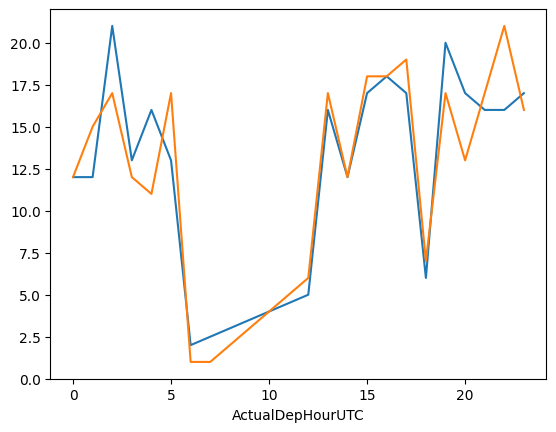

In [9]:
sim_df[sim_df['origin'] == 'DEN'].groupby('dep_hour')['origin'].count().plot.line()
real_df[real_df['ORIGIN'] == 'DEN'].groupby('ActualDepHourUTC')['ORIGIN'].count().plot.line()

<Axes: xlabel='ActualDepHourUTC'>

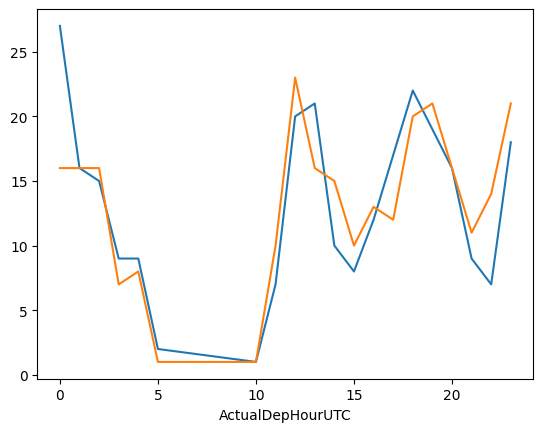

In [10]:
sim_df[sim_df['dest'] == 'DEN'].groupby('dep_hour')['origin'].count().plot.line()
real_df[real_df['DEST'] == 'DEN'].groupby('ActualDepHourUTC')['ORIGIN'].count().plot.line()

/opt/homebrew/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 14 rows containing missing values.


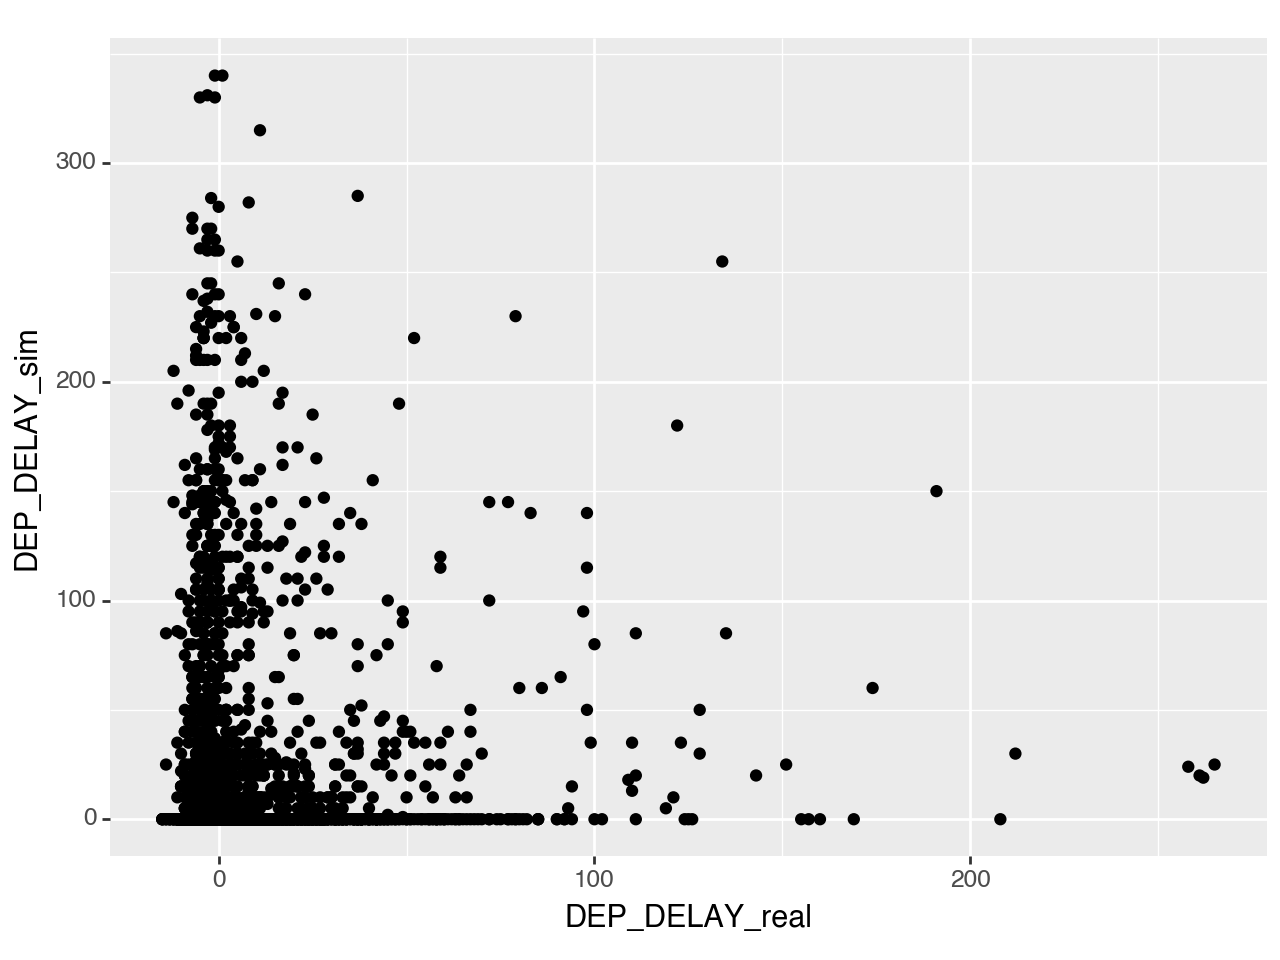

<Figure Size: (640 x 480)>

In [11]:
co.pn.ggplot(pd.merge(real_df, sim_df, on='id', suffixes=['_real', '_sim'])) + co.pn.geom_point(co.pn.aes(x='DEP_DELAY_real', y='DEP_DELAY_sim'))

<Axes: >

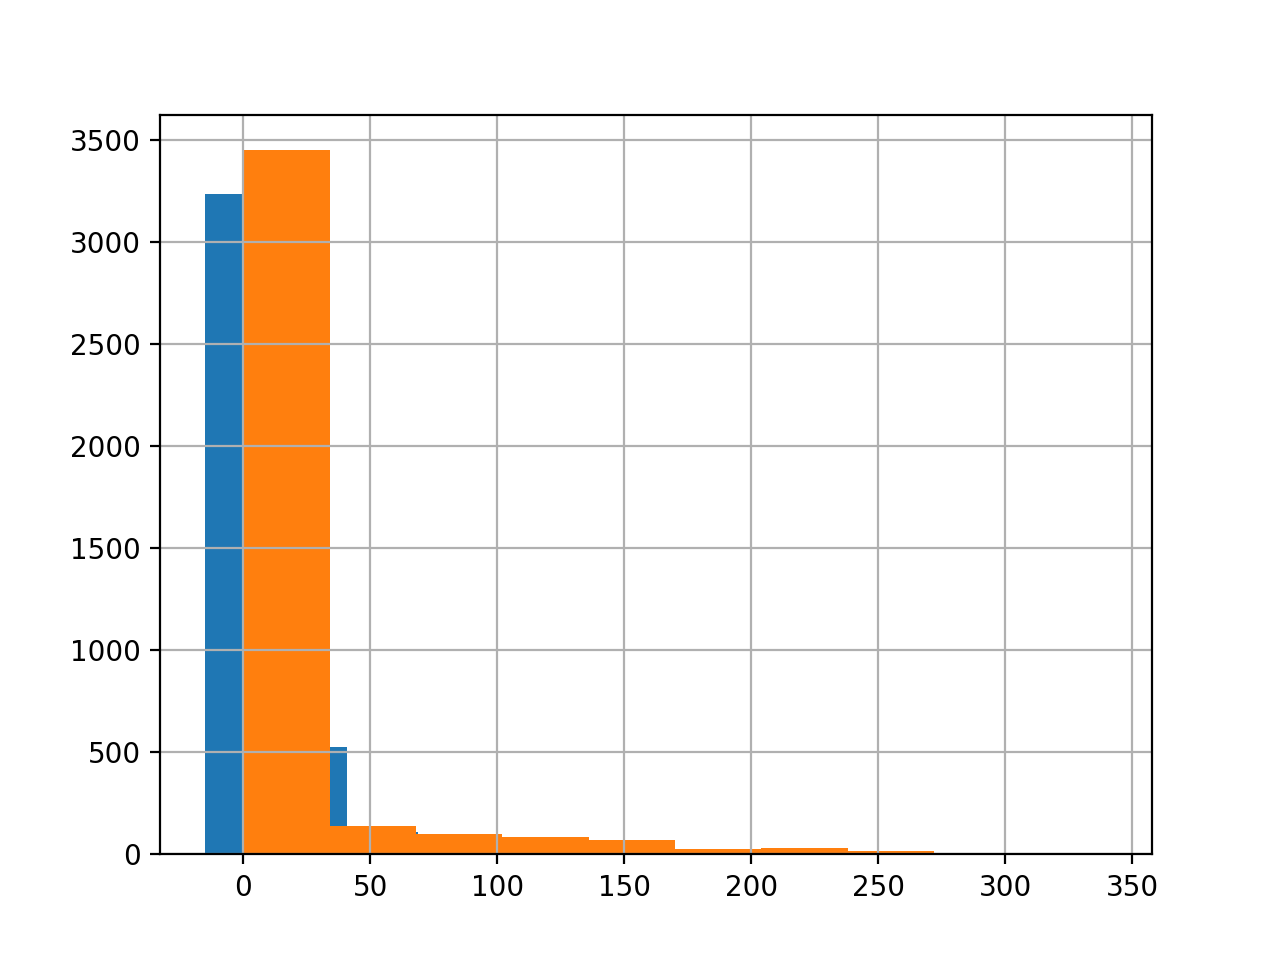

In [12]:
real_df['DEP_DELAY'].hist()
sim_df['DEP_DELAY'].hist()

In [13]:
oc.compare_otp()

{'actual': 0.8657701091093631, 'sim': 0.8102004567368688}

In [15]:
(oc.actual['DEP_DELAY'].sum(),
 oc.simulated['DEP_DELAY'].sum())

(21528.0, 62473.0)

In [8]:
all_df = pd.merge(sim_df, real_df, left_on='id', right_on='flight_id', suffixes=['sim', 'real'])
all_df

,id,flight_number,tail,crew,passengers,origin,dest,cancelled,dep_time,arr_time,...,ScheduledDepDatePacific,ScheduledDepHourPacific,ScheduledArrTimeUTC,ScheduledArrDateUTC,ScheduledArrHourUTC,ScheduledArrTimePacific,ScheduledArrDatePacific,ScheduledArrHourPacific,ActualDepTimeUTC,ActualArrTimeUTC
0,492728,1560,N791SW,837.0,143,SNA,SMF,0,2024-01-28 15:45:00,2024-01-28 17:30:00,...,2024-01-28,7,2024-01-28 17:30:00+00:00,2024-01-28,17,2024-01-28 09:30:00-08:00,2024-01-28,9,2024-01-28 15:42:00+00:00,2024-01-28 17:14:00+00:00
1,492003,1592,N473WN,701.0,143,SMF,LAX,0,2024-01-28 17:10:00,2024-01-28 18:40:00,...,2024-01-28,9,2024-01-28 18:40:00+00:00,2024-01-28,18,2024-01-28 10:40:00-08:00,2024-01-28,10,2024-01-28 17:24:00+00:00,2024-01-28 18:40:00+00:00
2,492310,1623,N7732A,6.0,0,SJC,SAN,0,2024-01-29 01:40:00,2024-01-29 03:05:00,...,2024-01-28,17,2024-01-29 03:05:00+00:00,2024-01-29,3,2024-01-28 19:05:00-08:00,2024-01-28,19,2024-01-29 01:38:00+00:00,2024-01-29 03:09:00+00:00
3,492572,2015,N7859B,94.0,126,LAS,TUS,0,2024-01-28 23:25:00,2024-01-29 00:45:00,...,2024-01-28,15,2024-01-29 00:45:00+00:00,2024-01-29,0,2024-01-28 16:45:00-08:00,2024-01-28,16,2024-01-28 23:25:00+00:00,2024-01-29 00:34:00+00:00
4,492826,262,N8323C,201.0,144,MCO,IND,0,2024-01-28 22:30:00,2024-01-29 01:00:00,...,2024-01-28,14,2024-01-29 01:00:00+00:00,2024-01-29,1,2024-01-28 17:00:00-08:00,2024-01-28,17,2024-01-28 22:38:00+00:00,2024-01-29 01:28:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,492434,1469,N7822A,631.0,0,MDW,MEM,0,2024-01-28 22:35:00,2024-01-29 00:25:00,...,2024-01-28,14,2024-01-29 00:25:00+00:00,2024-01-29,0,2024-01-28 16:25:00-08:00,2024-01-28,16,2024-01-28 22:35:00+00:00,2024-01-29 00:03:00+00:00
3937,492737,574,N793SA,427.0,0,DEN,BUR,0,2024-01-29 03:20:00,2024-01-29 05:55:00,...,2024-01-28,19,2024-01-29 05:55:00+00:00,2024-01-29,5,2024-01-28 21:55:00-08:00,2024-01-28,21,2024-01-29 03:20:00+00:00,2024-01-29 05:40:00+00:00
3938,494615,1776,N8893L,1370.0,175,MCO,MDW,0,2024-01-28 16:15:00,2024-01-28 19:10:00,...,2024-01-28,8,2024-01-28 19:10:00+00:00,2024-01-28,19,2024-01-28 11:10:00-08:00,2024-01-28,11,2024-01-28 16:20:00+00:00,2024-01-28 18:56:00+00:00
3939,492530,1290,N7849A,399.0,143,LAX,DEN,0,2024-01-28 20:10:00,2024-01-28 22:30:00,...,2024-01-28,12,2024-01-28 22:30:00+00:00,2024-01-28,22,2024-01-28 14:30:00-08:00,2024-01-28,14,2024-01-28 20:07:00+00:00,2024-01-28 22:15:00+00:00


In [9]:
for key in ['dep_time', 'arr_time', 'sched_dep', 'sched_arr']:
    all_df[key] = pd.to_datetime(all_df[key], utc=True)

In [10]:
all_df['sched_dep']

0      2024-01-28 15:45:00+00:00
1      2024-01-28 17:10:00+00:00
2      2024-01-29 01:40:00+00:00
3      2024-01-28 23:25:00+00:00
4      2024-01-28 22:30:00+00:00
                  ...           
3936   2024-01-28 22:35:00+00:00
3937   2024-01-29 03:20:00+00:00
3938   2024-01-28 16:15:00+00:00
3939   2024-01-28 20:10:00+00:00
3940   2024-01-28 12:25:00+00:00
Name: sched_dep, Length: 3941, dtype: datetime64[ns, UTC]

In [11]:
all_df['sim_dep_delay'] = (all_df['dep_time'] - all_df['sched_dep']).dt.total_seconds() / 60

In [12]:
all_df['sim_dep_delay'].sum()

3410.0

In [13]:
all_df['DEP_DELAY'].sum()

21528.0

In [14]:
all_df.columns

Index(['id', 'flight_number', 'tail', 'crew', 'passengers', 'origin', 'dest',
       'cancelled', 'dep_time', 'arr_time', 'sched_dep', 'sched_arr',
       'flight_id', 'FL_DATE', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'DIV1_AIRPORT',
       'DIV1_WHEELS_ON', 'OriginTimezone', 'DestTimezone', 'Div1Timezone',
       'ScheduledDepTimeUTC', 'ScheduledDepDateUTC', 'ScheduledDepHourUTC',
       'ScheduledDepTimePacific', 'ScheduledDepDatePacific',
       'ScheduledDepHourPacific', 'ScheduledArrTimeUTC', 'ScheduledArrDateUTC',
       'ScheduledArrHourUTC', 'ScheduledArrTimePacific',
       'ScheduledArrDatePacific', 'ScheduledArrHourPacific',
       'ActualDepTimeUTC'

In [15]:
all_df[(all_df['sim_dep_delay'] - all_df['DEP_DELAY']).abs() > 30]\
    [['id', 'flight_number', 'tail', 'origin', 'dest', 'sched_dep', 'dep_time', 'ActualDepTimeUTC', 'sim_dep_delay', 'DEP_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]\
    .sort_values('DEP_DELAY')

,id,flight_number,tail,origin,dest,sched_dep,dep_time,ActualDepTimeUTC,sim_dep_delay,DEP_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
3171,493562,1414,N8668A,AMA,DAL,2024-01-29 01:35:00+00:00,2024-01-29 06:05:00+00:00,2024-01-29 01:26:00+00:00,270.0,-9.0,NaN,NaN,NaN,NaN,NaN
1927,491480,2244,N259WN,CHS,BNA,2024-01-29 01:10:00+00:00,2024-01-29 01:45:00+00:00,2024-01-29 01:03:00+00:00,35.0,-7.0,NaN,NaN,NaN,NaN,NaN
2307,492422,1246,N7819A,BWI,DEN,2024-01-29 01:55:00+00:00,2024-01-29 03:45:00+00:00,2024-01-29 01:50:00+00:00,110.0,-5.0,NaN,NaN,NaN,NaN,NaN
482,491521,2880,N266WN,STL,PHX,2024-01-28 17:10:00+00:00,2024-01-28 17:45:00+00:00,2024-01-28 17:05:00+00:00,35.0,-5.0,NaN,NaN,NaN,NaN,NaN
2696,494377,3814,N8849Q,MDW,DEN,2024-01-29 01:25:00+00:00,2024-01-29 03:20:00+00:00,2024-01-29 01:20:00+00:00,115.0,-5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,492348,2921,N773SA,TPA,ATL,2024-01-28 19:15:00+00:00,2024-01-28 19:15:00+00:00,2024-01-28 22:47:00+00:00,0.0,212.0,11.0,0.0,0.0,0.0,193.0
1385,492261,2683,N7715E,PHX,BUF,2024-01-28 18:00:00+00:00,2024-01-28 18:15:00+00:00,2024-01-28 22:18:00+00:00,15.0,258.0,258.0,0.0,5.0,0.0,0.0
372,494770,1666,N7833A,RSW,IND,2024-01-29 00:55:00+00:00,2024-01-29 00:55:00+00:00,2024-01-29 05:16:00+00:00,0.0,261.0,0.0,0.0,0.0,0.0,260.0
289,492260,2683,N7715E,BUF,FLL,2024-01-28 22:35:00+00:00,2024-01-28 22:45:00+00:00,2024-01-29 02:57:00+00:00,10.0,262.0,0.0,0.0,0.0,0.0,254.0


## Case Study: `N7715E`

- Actual path: DEN -> PHX -> BUF -> FLL
- Simulated path: PHX -> BUF -> FLL
  - DEN -> PHX was executed by `N564WN` instead from 1930Z to 2130Z on 01-28 (SWA1764)
  - `N564WN` actually flew from `LIR` (Liberia, Costa Rica) into Denver and arrived at around 1925Z
  - Case in point: Lack of international flights at the source contributes to discrepancies in schedule execution

In [16]:
all_df.query('tail != TAIL_NUM').shape

(55, 56)

55 out of 3941 flights were executed with a different aircraft than the actual planned aircraft in the simulation.

In [17]:
all_df.query('flight_number == 1764')

,id,flight_number,tail,crew,passengers,origin,dest,cancelled,dep_time,arr_time,...,ScheduledDepHourPacific,ScheduledArrTimeUTC,ScheduledArrDateUTC,ScheduledArrHourUTC,ScheduledArrTimePacific,ScheduledArrDatePacific,ScheduledArrHourPacific,ActualDepTimeUTC,ActualArrTimeUTC,sim_dep_delay
1009,492259,1764,N564WN,252.0,175,DEN,PHX,0,2024-01-28 19:30:00+00:00,2024-01-28 21:30:00+00:00,...,11,2024-01-28 21:30:00+00:00,2024-01-28,21,2024-01-28 13:30:00-08:00,2024-01-28,13,2024-01-28 19:31:00+00:00,2024-01-28 21:18:00+00:00,0.0
3894,491246,1764,N211WN,28.0,143,PHX,SJC,0,2024-01-28 22:55:00+00:00,2024-01-29 00:50:00+00:00,...,14,2024-01-29 00:05:00+00:00,2024-01-29,0,2024-01-28 16:05:00-08:00,2024-01-28,16,2024-01-28 22:59:00+00:00,2024-01-29 00:40:00+00:00,45.0


In [18]:
all_df.query('tail == "N7819A"').sort_values('ScheduledDepTimeUTC')[['id', 'flight_number', 'tail', 'origin', 'dest', 'sched_dep', 'dep_time', 'ActualDepTimeUTC', 'arr_time', 'ActualArrTimeUTC', 'sim_dep_delay', 'DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'TAIL_NUM']]

,id,flight_number,tail,origin,dest,sched_dep,dep_time,ActualDepTimeUTC,arr_time,ActualArrTimeUTC,sim_dep_delay,DEP_DELAY,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TAIL_NUM
1472,492421,1197,N7819A,TPA,HOU,2024-01-28 11:30:00+00:00,2024-01-28 11:30:00+00:00,2024-01-28 11:26:00+00:00,2024-01-28 13:55:00+00:00,2024-01-28 13:44:00+00:00,0.0,-4.0,-11.0,NaN,NaN,NaN,NaN,NaN,N7819A
1011,492564,3461,N7819A,HOU,BWI,2024-01-29 00:25:00+00:00,2024-01-29 00:25:00+00:00,2024-01-29 00:29:00+00:00,2024-01-29 03:10:00+00:00,2024-01-29 03:18:00+00:00,0.0,4.0,8.0,NaN,NaN,NaN,NaN,NaN,N7857B
2307,492422,1246,N7819A,BWI,DEN,2024-01-29 01:55:00+00:00,2024-01-29 03:45:00+00:00,2024-01-29 01:50:00+00:00,2024-01-29 08:05:00+00:00,2024-01-29 05:45:00+00:00,110.0,-5.0,-30.0,NaN,NaN,NaN,NaN,NaN,N7819A


In [19]:
all_df.query('TAIL_NUM == "N7819A"').sort_values('ScheduledDepTimeUTC')[['id', 'flight_number', 'tail', 'origin', 'dest', 'sched_dep', 'dep_time', 'ActualDepTimeUTC', 'arr_time', 'ActualArrTimeUTC', 'sim_dep_delay', 'DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'TAIL_NUM']]

,id,flight_number,tail,origin,dest,sched_dep,dep_time,ActualDepTimeUTC,arr_time,ActualArrTimeUTC,sim_dep_delay,DEP_DELAY,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TAIL_NUM
1472,492421,1197,N7819A,TPA,HOU,2024-01-28 11:30:00+00:00,2024-01-28 11:30:00+00:00,2024-01-28 11:26:00+00:00,2024-01-28 13:55:00+00:00,2024-01-28 13:44:00+00:00,0.0,-4.0,-11.0,NaN,NaN,NaN,NaN,NaN,N7819A
2307,492422,1246,N7819A,BWI,DEN,2024-01-29 01:55:00+00:00,2024-01-29 03:45:00+00:00,2024-01-29 01:50:00+00:00,2024-01-29 08:05:00+00:00,2024-01-29 05:45:00+00:00,110.0,-5.0,-30.0,NaN,NaN,NaN,NaN,NaN,N7819A


In [20]:
all_df.query('tail == "N7857B"').sort_values('ScheduledDepTimeUTC')[['id', 'flight_number', 'tail', 'origin', 'dest', 'sched_dep', 'dep_time', 'ActualDepTimeUTC', 'arr_time', 'ActualArrTimeUTC', 'sim_dep_delay', 'DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'TAIL_NUM']]

,id,flight_number,tail,origin,dest,sched_dep,dep_time,ActualDepTimeUTC,arr_time,ActualArrTimeUTC,sim_dep_delay,DEP_DELAY,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TAIL_NUM
2390,492563,102,N7857B,ELP,DEN,2024-01-28 13:15:00+00:00,2024-01-28 13:15:00+00:00,2024-01-28 13:14:00+00:00,2024-01-28 15:10:00+00:00,2024-01-28 14:57:00+00:00,0.0,-1.0,-13.0,NaN,NaN,NaN,NaN,NaN,N7857B
466,491294,3235,N7857B,DEN,PIT,2024-01-29 01:30:00+00:00,2024-01-29 01:30:00+00:00,2024-01-29 01:49:00+00:00,2024-01-29 04:20:00+00:00,2024-01-29 04:57:00+00:00,0.0,19.0,37.0,19.0,0.0,18.0,0.0,0.0,N221WN


In [21]:
all_df.query('TAIL_NUM == "N7857B"').sort_values('ScheduledDepTimeUTC')[['id', 'flight_number', 'tail', 'origin', 'dest', 'sched_dep', 'dep_time', 'ActualDepTimeUTC', 'arr_time', 'ActualArrTimeUTC', 'sim_dep_delay', 'DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'TAIL_NUM']]

,id,flight_number,tail,origin,dest,sched_dep,dep_time,ActualDepTimeUTC,arr_time,ActualArrTimeUTC,sim_dep_delay,DEP_DELAY,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TAIL_NUM
2390,492563,102,N7857B,ELP,DEN,2024-01-28 13:15:00+00:00,2024-01-28 13:15:00+00:00,2024-01-28 13:14:00+00:00,2024-01-28 15:10:00+00:00,2024-01-28 14:57:00+00:00,0.0,-1.0,-13.0,NaN,NaN,NaN,NaN,NaN,N7857B
1011,492564,3461,N7819A,HOU,BWI,2024-01-29 00:25:00+00:00,2024-01-29 00:25:00+00:00,2024-01-29 00:29:00+00:00,2024-01-29 03:10:00+00:00,2024-01-29 03:18:00+00:00,0.0,4.0,8.0,NaN,NaN,NaN,NaN,NaN,N7857B


## Case study: `N7819A` and `492422`

Causal chain:
- `491295` (SWA3851, MTJ-DEN, N221WN) cancelled due to **crew shortage**
- `491294` (SWA3235, DEN-PIT, N221WN) executed with N7857B instead in the simulation (consumed N7857B because N221WN was cancelled)
- **N7819A actually executed HOU-LIR, LIR-BWI; escaped dataset for being overseas**
- **N7857B actually executed DEN-PVR, PVR-HOU; escaped dataset for being overseas**
- `492564` (SWA3461, HOU-BWI, N7857B) executed with N7819A instead in the simulation (consumed N7819A because N7857B was consumed)
- `492422` (SWA1246, BWI-DEN, N7819A) got delayed because N7819A arrived late from HOU

<Axes: >

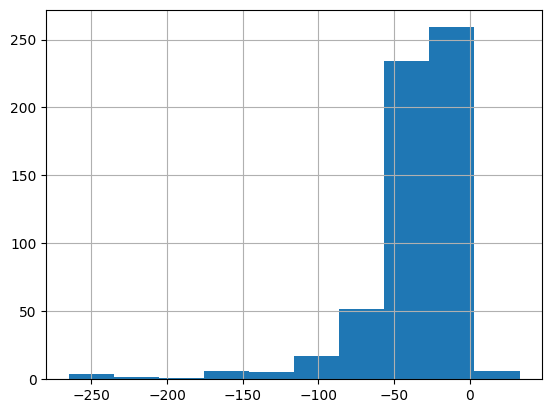

In [22]:
delayed_df = all_df[all_df.DEP_DELAY > 15]
((delayed_df['sim_dep_delay'] - delayed_df['DEP_DELAY'])).hist()

In [24]:
delayed_df = delayed_df.copy()
delayed_df['sim_minus_irl'] = delayed_df['sim_dep_delay'] - delayed_df['DEP_DELAY']

In [27]:
delayed_df[delayed_df['sim_minus_irl'] < -30]

,id,flight_number,tail,crew,passengers,origin,dest,cancelled,dep_time,arr_time,...,ScheduledArrTimeUTC,ScheduledArrDateUTC,ScheduledArrHourUTC,ScheduledArrTimePacific,ScheduledArrDatePacific,ScheduledArrHourPacific,ActualDepTimeUTC,ActualArrTimeUTC,sim_dep_delay,sim_minus_irl
12,494152,1281,N8806Q,407.0,1,AUS,FLL,0,2024-01-29 01:25:00+00:00,2024-01-29 03:55:00+00:00,...,2024-01-29 03:55:00+00:00,2024-01-29,3,2024-01-28 19:55:00-08:00,2024-01-28,19,2024-01-29 02:14:00+00:00,2024-01-29 04:40:00+00:00,0.0,-49.0
17,491390,1898,N241WN,773.0,132,DCA,BNA,0,2024-01-28 17:25:00+00:00,2024-01-28 19:30:00+00:00,...,2024-01-28 18:40:00+00:00,2024-01-28,18,2024-01-28 10:40:00-08:00,2024-01-28,10,2024-01-28 18:43:00+00:00,2024-01-28 20:16:00+00:00,50.0,-78.0
30,491169,824,N1808U,159.0,0,LAS,LGB,0,2024-01-29 01:15:00+00:00,2024-01-29 02:25:00+00:00,...,2024-01-29 02:25:00+00:00,2024-01-29,2,2024-01-28 18:25:00-08:00,2024-01-28,18,2024-01-29 02:55:00+00:00,2024-01-29 03:53:00+00:00,0.0,-100.0
42,493429,3080,N8639B,969.0,26,TPA,PHX,0,2024-01-28 23:55:00+00:00,2024-01-29 04:40:00+00:00,...,2024-01-29 04:40:00+00:00,2024-01-29,4,2024-01-28 20:40:00-08:00,2024-01-28,20,2024-01-29 00:50:00+00:00,2024-01-29 05:17:00+00:00,0.0,-55.0
62,494276,2413,N8830Q,148.0,0,MIA,MSY,0,2024-01-28 23:45:00+00:00,2024-01-29 01:55:00+00:00,...,2024-01-29 01:00:00+00:00,2024-01-29,1,2024-01-28 17:00:00-08:00,2024-01-28,17,2024-01-29 00:54:00+00:00,2024-01-29 03:15:00+00:00,55.0,-69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840,494740,2727,N902WN,1231.0,143,BWI,MIA,0,2024-01-28 19:15:00+00:00,2024-01-28 21:55:00+00:00,...,2024-01-28 21:55:00+00:00,2024-01-28,21,2024-01-28 13:55:00-08:00,2024-01-28,13,2024-01-28 19:47:00+00:00,2024-01-28 22:46:00+00:00,0.0,-32.0
3845,492258,1076,N7713A,1289.0,0,PHX,HOU,0,2024-01-29 02:00:00+00:00,2024-01-29 04:20:00+00:00,...,2024-01-29 04:20:00+00:00,2024-01-29,4,2024-01-28 20:20:00-08:00,2024-01-28,20,2024-01-29 03:23:00+00:00,2024-01-29 05:41:00+00:00,0.0,-83.0
3862,494462,3638,N8863Q,906.0,56,OAK,BOI,0,2024-01-29 03:50:00+00:00,2024-01-29 05:25:00+00:00,...,2024-01-29 05:25:00+00:00,2024-01-29,5,2024-01-28 21:25:00-08:00,2024-01-28,21,2024-01-29 04:49:00+00:00,2024-01-29 06:19:00+00:00,0.0,-59.0
3871,491393,3023,N241WN,685.0,0,OAK,BUR,0,2024-01-29 03:05:00+00:00,2024-01-29 04:15:00+00:00,...,2024-01-29 04:10:00+00:00,2024-01-29,4,2024-01-28 20:10:00-08:00,2024-01-28,20,2024-01-29 03:59:00+00:00,2024-01-29 05:03:00+00:00,5.0,-54.0


273 out of 3941 flights (about 7%) had an eventual simulated departure delay that was different from the actual departure delay by more than 30 minutes.

In [35]:
((all_df['dep_time'] - all_df['ActualDepTimeUTC']).dt.total_seconds() / 60).describe()

count    3939.000000
mean       -4.599137
std        20.038587
min      -265.000000
25%        -7.000000
50%         1.000000
75%         5.000000
max       120.000000
dtype: float64